In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from glob import glob

def plot_subcubes_projection(data, indices, title, save_path, voxel_size=0.82, redshift=None):
    fig, axes = plt.subplots(3, 3, figsize=(14, 14))

    # Title formatting
    z_info = f"(z = {redshift})" if redshift is not None else ""
    projection_info = r"$\log_{10}\left( \sum_z [1 + \delta] \right)$"
    size_info = f"{data.shape[1]}³ voxels = {voxel_size * data.shape[1]:.1f}³ cMpc/h³"
    full_title = f"{title} {z_info}\nProjection along Z-axis, {size_info}\n{projection_info}"
    fig.suptitle(full_title, fontsize=16)

    for idx, ax in zip(indices, axes.ravel()):
        #subcube = data[idx, 0]  # shape: (D, H, W)
        #print("Subcube shape:", subcube.shape)
        subcube = data[idx]

        projection = np.sum(1 + subcube, axis=0)
        log_proj = np.log10(projection + 1e-8)

        im = ax.imshow(log_proj, origin='lower', cmap='cividis')
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label(r'$\log_{10} \left( \sum_z [1 + \delta] \right)$', fontsize=10)

        ax.set_title(f"Subcube index: {idx}", fontsize=10)
        ax.set_xlabel(f"X [voxels, {voxel_size:.2f} cMpc/h]", fontsize=9)
        ax.set_ylabel(f"Y [voxels, {voxel_size:.2f} cMpc/h]", fontsize=9)
        ax.tick_params(axis='both', which='both', labelsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.savefig(save_path)
    plt.close()
    print(f"✅ Saved: {save_path}")

def visualize_subcube_samples(input_path, output_path, dataset="subcubes", voxel_size=0.82):
    basename = os.path.splitext(os.path.basename(input_path))[0]
    os.makedirs("figures", exist_ok=True)

    with h5py.File(input_path, "r") as f_in, h5py.File(output_path, "r") as f_out:
        input_data = f_in[dataset]
        output_data = f_out[dataset]
        total = input_data.shape[0]
        assert total >= 9, "Dataset must contain at least 9 subcubes."

        first_indices = list(range(9))
        random_indices = [4300, 3036, 6891, 9519, 2143, 1565, 526, 7961, 5591]

        # Visualize input at z = 0
        plot_subcubes_projection(input_data, first_indices,
                                 title=f"{basename} - Input (First 9)",
                                 save_path=f"figures/{basename}_input_first9.png",
                                 voxel_size=voxel_size,
                                 redshift=0)
        plot_subcubes_projection(input_data, random_indices,
                                 title=f"{basename} - Input (Random 9)",
                                 save_path=f"figures/{basename}_input_random9.png",
                                 voxel_size=voxel_size,
                                 redshift=0)

        # Visualize output at z = 127
        plot_subcubes_projection(output_data, first_indices,
                                 title=f"{basename} - Output (First 9)",
                                 save_path=f"figures/{basename}_output_first9.png",
                                 voxel_size=voxel_size,
                                 redshift=127)
        plot_subcubes_projection(output_data, random_indices,
                                 title=f"{basename} - Output (Random 9)",
                                 save_path=f"figures/{basename}_output_random9.png",
                                 voxel_size=voxel_size,
                                 redshift=127)

def visualize_all_subcube_files(input_dir, output_dir):
    input_files = sorted(glob(os.path.join(input_dir, "*.h5")))
    output_files = sorted(glob(os.path.join(output_dir, "*.h5")))

    assert len(input_files) == len(output_files), "Mismatch in number of input/output files"

    for in_file, out_file in zip(input_files, output_files):
        print(f"\n📂 Visualizing file pair:\n - Input: {in_file}\n - Output: {out_file}")
        visualize_subcube_samples(in_file, out_file)



📂 Visualizing file pair:
 - Input: /caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_000.h5
 - Output: /caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_000.h5
✅ Saved: figures/subcubes_stride4_50mpc_000_input_first9.png
✅ Saved: figures/subcubes_stride4_50mpc_000_input_random9.png
✅ Saved: figures/subcubes_stride4_50mpc_000_output_first9.png
✅ Saved: figures/subcubes_stride4_50mpc_000_output_random9.png

📂 Visualizing file pair:
 - Input: /caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_001.h5
 - Output: /caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_001.h5
✅ Saved: figures/subcubes_stride4_50mpc_001_input_first9.png
✅ Saved: figures/subcubes_stride4_50mpc_001_input_random9.png
✅ Saved: figures/subcubes_stride4_50mpc_001_output_first9.png
✅ Saved: figures/subcubes_stride4_50mpc_001_output_random9.png

📂 Visualizing file pair:
 - Input: /caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_002.h5
 - Output: /caefs/data/Illu

IndexError: Index (4300) out of range for (0-591)

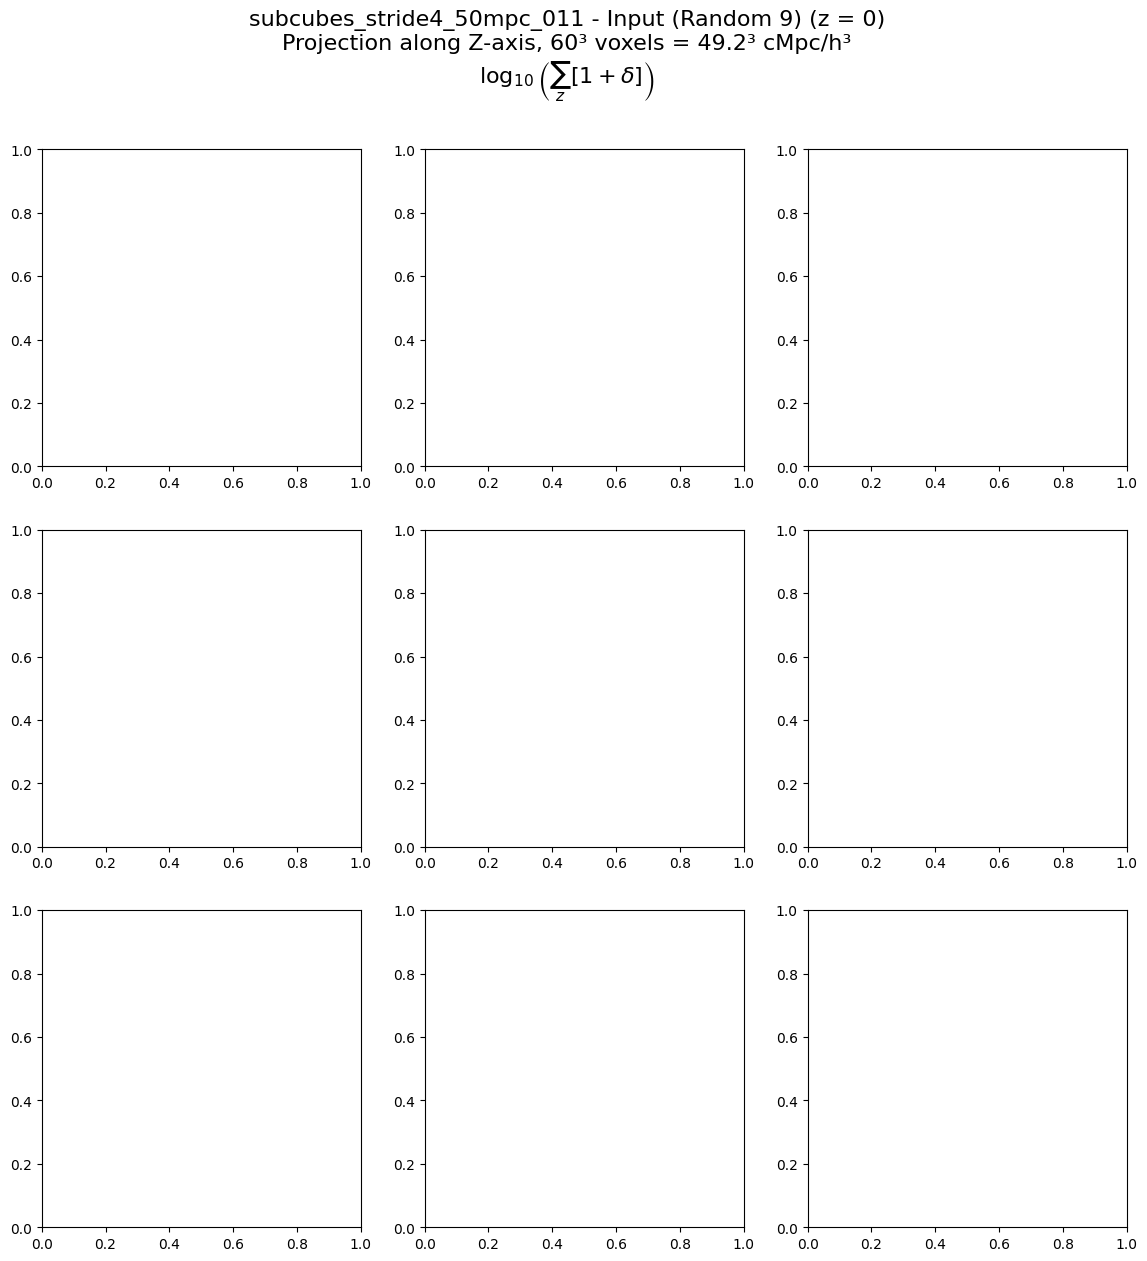

In [2]:
# 경로 설정 후 실행
input_dir = "/caefs/data/IllustrisTNG/subcube/input/"
output_dir = "/caefs/data/IllustrisTNG/subcube/output/"
input_file = "/caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_010.h5"
target_file = "/caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_010.h5"
unet_pred_file = "/caefs/data/IllustrisTNG/predictions/unet/Sample100_epoch100/subcubes_stride4_50mpc_010.h5"
fno_pred_file  = "/caefs/data/IllustrisTNG/predictions/fno/Sample100_epoch100/subcubes_stride4_50mpc_010.h5"


unet_pred_dir = "/caefs/data/IllustrisTNG/predictions/unet/Sample100_epoch100/"
fno_pred_dir  = "/caefs/data/IllustrisTNG/predictions/fno/Sample100_epoch100/"
visualize_all_subcube_files(input_dir, output_dir)
